### 506. Clusterização com dados categóricos I
<h1>Clusterização com dados categóricos e mistos</h1><h2>Modelos para dados categóricos</h2><ul><li>Camodes<ul><li>Similar ao K-means, mas utiliza a moda ao invés da média para dados categóricos</li></ul></li><li>Análise de Correspondência (Simples ou Múltipla)<ul><li>Analisa quão próximas ou associadas são as categorias de variáveis categóricas</li><li>Gera componentes numéricos que podem ser utilizados no K-means</li></ul></li></ul><h2>Modelos para dados mistos</h2><ul><li>K-prototypes<ul><li>Une o K-means para dados numéricos e o K-modes para dados categóricos</li></ul></li><li>Factor Analysis of Mixed Data (FAMD)<ul><li>Equivalente ao PCA para dados mistos</li></ul></li></ul><h2>Exemplo com Camodes</h2><ul><li>Utiliza o dataset de cogumelos com variáveis categóricas (cor, superfície, forma)</li><li>Testa de 2 a 10 clusters</li><li>Plota o &quot;custo&quot; (similar à inércia no K-means) por número de clusters</li><li>Sugere utilizar 7 clusters com base no gráfico</li></ul><p>Esse é um resumo abrangente do vídeo destacando o tema central de clusterização para dados categóricos e mistos, e os principais tópicos e modelos abordados, com um exemplo prático de aplicação do K-modes.</p>

In [30]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [31]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [32]:
from yellowbrick.datasets import load_mushroom

In [33]:
# Load data
df_mushroom = load_mushroom()[0]
df_mushroom

,shape,surface,color
0,convex,smooth,yellow
1,bell,smooth,white
2,convex,scaly,white
3,convex,smooth,gray
4,convex,scaly,yellow
...,...,...,...
8118,knobbed,smooth,brown
8119,convex,smooth,brown
8120,flat,smooth,brown
8121,knobbed,scaly,brown


In [34]:
# Clustering with KModes
model = KModes(n_clusters=4)
labels = model.fit_predict(df_mushroom)
print(labels)
print(model.cost_)

[0 1 0 ... 1 0 0]
8851.0


In [35]:
# Avaliando modelo
custos = [KModes(n_clusters=K).fit(df_mushroom).cost_ for K in range(2,11)]
custos

[np.float64(11560.0),
 np.float64(10343.0),
 np.float64(8851.0),
 np.float64(8111.0),
 np.float64(7203.0),
 np.float64(6708.0),
 np.float64(6416.0),
 np.float64(6190.0),
 np.float64(5882.0)]

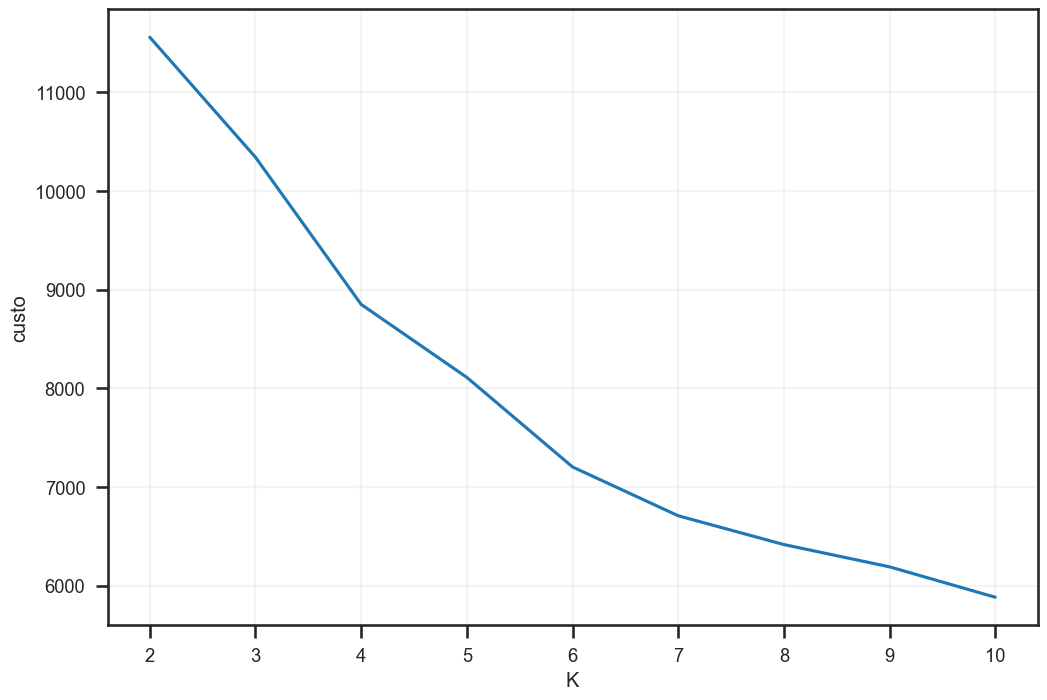

In [36]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()

### 507. Clusterização com dados categóricos II
<h1>Tema central: Análise de clusters para dados mistos (numéricos e categóricos)</h1><h2>Dados categóricos</h2><ul><li>Não dá para calcular média, moda, etc.</li><li>Solução: K-modes</li><li>Utiliza distância Hamming para medir dissimilaridade entre observações</li><li>Atribui pesos para cada categoria</li></ul><h2>Dados mistos</h2><ul><li>Exemplo: dados de diabetes</li><li>Solução: K-prototypes</li><li>Une K-means para dados numéricos e K-modes para dados categóricos</li><li>Pré-processamento:<ul><li>Normaliza os dados numéricos (média 0 e desvio padrão 1)</li><li>Obtém índices das colunas categóricas</li></ul></li></ul><h2>Considerações</h2><ul><li>K-prototypes é para dados mistos</li><li>Se forem só numéricos, usar K-means</li><li>Se forem só categóricos, usar K-modes</li><li>Pode-se clusterizar apenas os numéricos e usar os categóricos para descrever</li></ul>

Fonte e dicionário do dataset: [https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [37]:
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/Ekeany/Clustering-Mixed-Data/main/data/heart.csv')
df_diabetes = df_diabetes.drop(columns='target')
df_diabetes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [38]:
# Padroniza dados numéricos
# scale padronização de media 0 e 1
numerical_columns = ['age', 'trestbps','chol', 'thalach', 'oldpeak']
df_diabetes[numerical_columns]=df_diabetes[numerical_columns].apply(scale)

In [39]:
# Define posições dos dados categóricos
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_index=df_diabetes.columns.isin(categorical_columns).nonzero()[0].tolist()

In [40]:
df_diabetes.columns.isin(categorical_columns)

array([False,  True,  True, False, False,  True,  True, False,  True,
       False,  True,  True,  True])

In [41]:
# pegar o indice dela nonzero
# tolist convertendo para uma lista
df_diabetes.columns.isin(categorical_columns).nonzero()[0].tolist()

[1, 2, 5, 6, 8, 10, 11, 12]

In [42]:
# Modelagem com KPrototypes
model=KPrototypes()
model.fit(df_diabetes, categorical=categorical_index)

KPrototypes(gamma=np.float64(0.5))

In [43]:
model.predict(df_diabetes, categorical=categorical_index)

array([1, 2, 2, 3, 6, 0, 6, 2, 7, 7, 7, 3, 3, 0, 7, 0, 6, 1, 2, 7, 0, 2,
       2, 7, 2, 7, 7, 0, 6, 0, 2, 0, 2, 3, 5, 2, 3, 7, 7, 6, 6, 3, 5, 3,
       3, 3, 2, 3, 0, 3, 3, 6, 0, 2, 7, 2, 2, 3, 2, 3, 0, 3, 2, 2, 7, 2,
       0, 2, 2, 0, 3, 0, 2, 3, 2, 3, 3, 7, 2, 0, 2, 3, 3, 7, 5, 6, 0, 2,
       0, 0, 2, 3, 2, 3, 0, 4, 6, 0, 3, 3, 2, 1, 7, 2, 2, 0, 7, 3, 3, 3,
       7, 7, 6, 2, 3, 2, 2, 0, 2, 3, 6, 3, 2, 3, 2, 2, 0, 7, 2, 4, 7, 3,
       3, 2, 3, 3, 0, 0, 0, 4, 3, 3, 2, 0, 4, 7, 2, 7, 2, 2, 1, 0, 7, 7,
       2, 0, 2, 2, 0, 3, 3, 6, 2, 2, 2, 4, 1, 1, 0, 1, 0, 2, 6, 1, 1, 5,
       0, 6, 5, 4, 6, 4, 6, 0, 1, 3, 0, 4, 2, 2, 6, 1, 0, 1, 1, 1, 1, 0,
       4, 0, 2, 1, 4, 7, 1, 3, 0, 1, 5, 7, 0, 1, 5, 6, 0, 5, 4, 6, 1, 3,
       6, 1, 6, 1, 5, 1, 4, 5, 7, 6, 2, 4, 7, 4, 4, 3, 3, 6, 6, 3, 1, 7,
       1, 4, 4, 3, 6, 4, 7, 1, 1, 3, 4, 0, 7, 3, 1, 4, 7, 5, 7, 3, 4, 0,
       0, 0, 1, 0, 1, 4, 3, 1, 4, 0, 5, 2, 4, 0, 6, 1, 5, 0, 0, 2, 1, 5,
       7, 7, 6, 5, 7, 1, 1, 7, 5, 1, 0, 4, 4, 5, 1,

In [44]:
# Avaliando modelo
model.cost_

np.float64(1050.5725455523036)

In [47]:
custos = [
    KPrototypes(K).fit(df_diabetes, categorical=categorical_index).cost_
    for K in range(2,11)
]
custos

[np.float64(1566.2403908950237),
 np.float64(1400.5686510438552),
 np.float64(1294.0972390161812),
 np.float64(1211.2442120055123),
 np.float64(1138.709869533768),
 np.float64(1100.4351341377876),
 np.float64(1063.9795884849534),
 np.float64(1017.8730858955951),
 np.float64(990.6073293353743)]

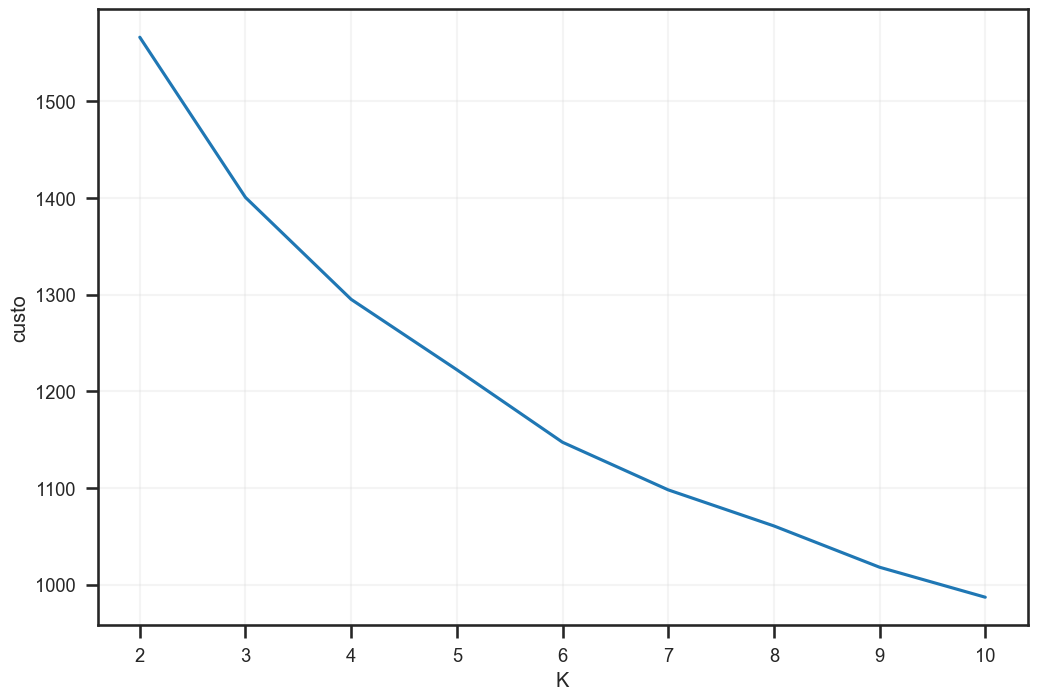

In [46]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()